## Video Game Sales

#### Goal
You work for a data science consulting company. A major video game production company, has retained your firm to conduct market research into the video game industry. They've furnished you with video game sales data for the last thirty years (described below) and, as a first project, would like to know:

1. What are some major differences between the North American, European, and Japanese video game markets?

2. What video game genres are trending in each market?

3. What features about a video game are most indicative of its success?

In [3]:
import pandas as pd
import numpy as np

# Bring in some plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

from datetime import datetime

## Import, inspect, and clean data

In [6]:
! ls

README.md      Untitled.ipynb vgsales.csv


In [4]:
df = pd.read_csv('vgsales.csv')

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [12]:
# Drop an errant year of 2020
df = df.loc[df['Year'] <= 2017]

In [123]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [124]:
# Drop publisher NaNs
df = df.dropna()

In [18]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [21]:
df.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

## Nuances between NA, JPN, and EU markets

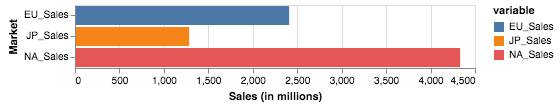

In [63]:
# Overall sales in EU, JP, NA
source = pd.melt(df, id_vars='Name', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])\
                                                    .groupby('variable').sum().reset_index()

alt.Chart(source).mark_bar().encode(
    y=alt.Y('variable', axis=alt.Axis(title='Market')),
    x=alt.X('value', axis=alt.Axis(title='Sales (in millions)')), 
    color='variable')


#### Sales by Platform across the NA, EU, JPN markets

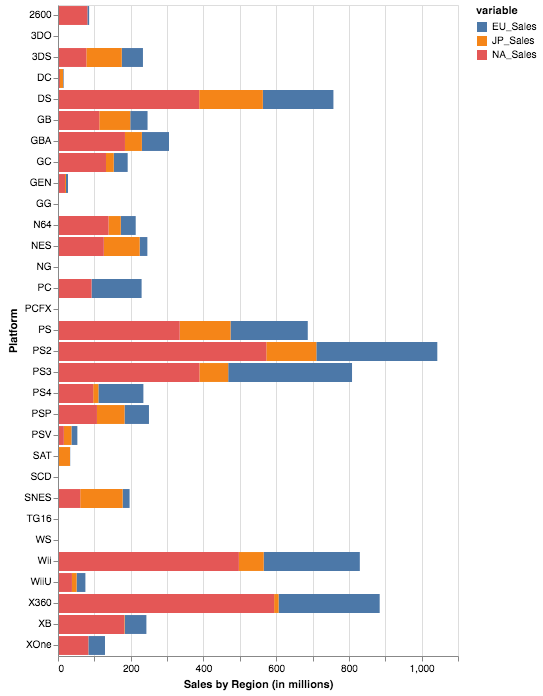

In [61]:
source = pd.melt(df, id_vars='Platform', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])\
                                            .groupby(['Platform', 'variable']).sum().reset_index()

alt.Chart(source).mark_bar().encode(
    y='Platform',
    color='variable',
    x=alt.Y('value', axis=alt.Axis(title='Sales by Region (in millions)'))
)

#### Sales by Genre across the NA, EU, JPN markets

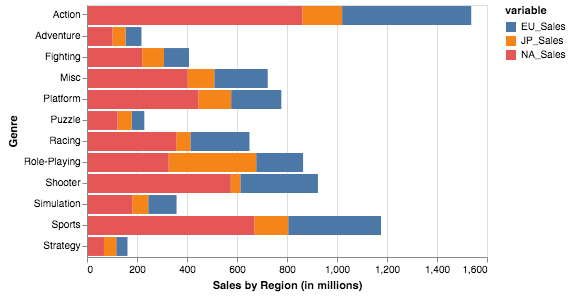

In [62]:
source = pd.melt(df, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])\
                                            .groupby(['Genre', 'variable']).sum().reset_index()

alt.Chart(source).mark_bar().encode(
    y='Genre',
    color='variable',
    x=alt.Y('value', axis=alt.Axis(title='Sales by Region (in millions)'))
)

#### Sales by Publisher across the NA, EU, JPN markets

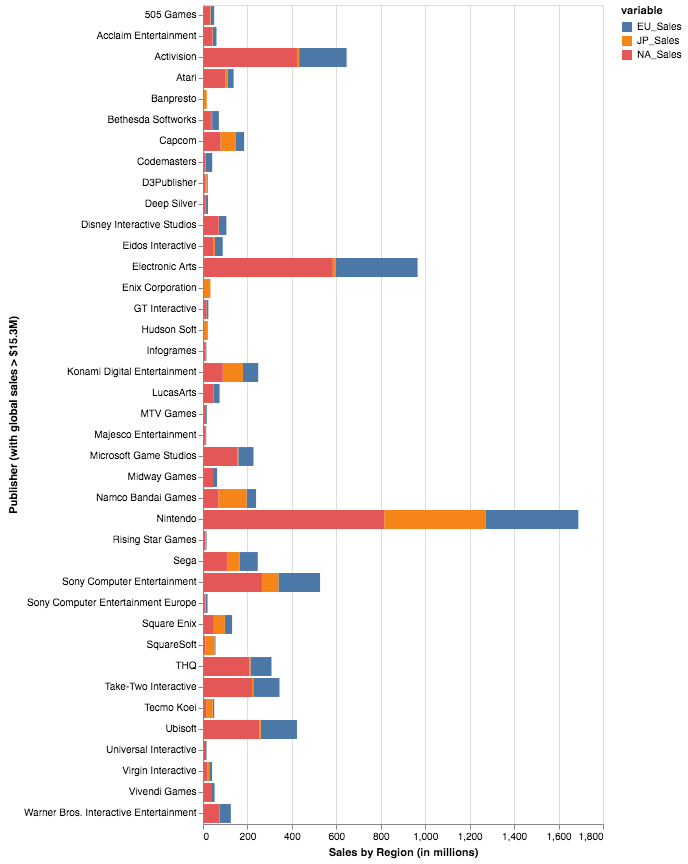

In [98]:
# Publisher

# First, let's only look at publishers that have significant sales volume
publisher_sales = df.groupby('Publisher').sum()

# Mean of global sales
#publisher_sales.sort_values(by='Global_Sales', ascending=False)

# Publishers with sales greater than the mean of all publisher's global sales
publisher_sales_big = publisher_sales.loc[publisher_sales['Global_Sales'] > 15.298056]

df_big_publishers = df.loc[df['Publisher'].isin(publisher_sales_big.index)]

source = pd.melt(df_big_publishers, id_vars='Publisher', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])\
                                            .groupby(['Publisher', 'variable']).sum().reset_index()

alt.Chart(source).mark_bar().encode(
    y=alt.Y('Publisher', axis=alt.Axis(title='Publisher (with global sales > $15.3M)')),
    color='variable',
    x=alt.Y('value', axis=alt.Axis(title='Sales by Region (in millions)'))
)

## Trending video game genres in each market

Here, I define trending based on the last 2 years of data (i.e. 2016 and 2017).

In [100]:
df_recent = df.loc[df['Year'] >= 2016]


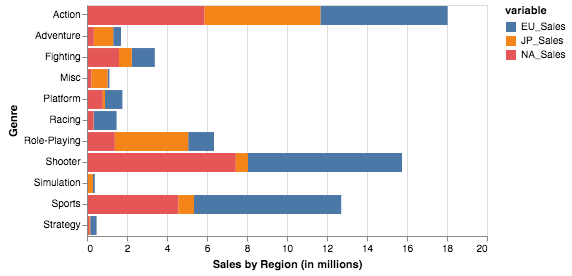

In [102]:
source = pd.melt(df_recent, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])\
                                            .groupby(['Genre', 'variable']).sum().reset_index()

alt.Chart(source).mark_bar().encode(
    y='Genre',
    color='variable',
    x=alt.Y('value', axis=alt.Axis(title='Sales by Region (in millions)'))
)

This is pretty straightforward to interpret - Action, Shooter, and Sports dominate the markets. However, while Action is similar across the markets, there is a particular interest in Role-Playing games in Japan, while Japan isn't as interested in Shooters and Sports games compared to the NA and EU markets. If you are developing an Adventure, Misc, Role-Playing, or Simulation game, it's more likely going to do well in the Japanese market and not so much in NA or EU. Racing games are clinging on to popularity in the EU but that's about it.  

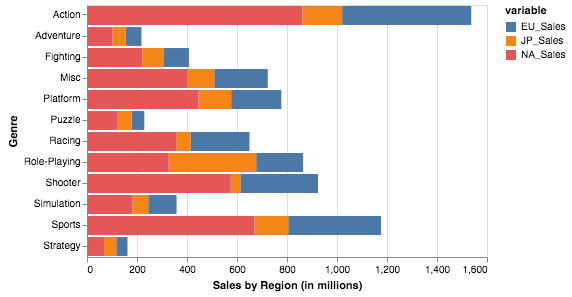

In [103]:
# How does this compare to prior years? 

df_older = df.loc[df['Year'] <= 2016]

source = pd.melt(df_older, id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'])\
                                            .groupby(['Genre', 'variable']).sum().reset_index()

alt.Chart(source).mark_bar().encode(
    y='Genre',
    color='variable',
    x=alt.Y('value', axis=alt.Axis(title='Sales by Region (in millions)'))
)

Comparing the two graphs above shows that Action games have maintained their dominance, but show a particular spike in popularity in Japan, while Shooter games have increased greatly in popularity in EU and NA. Japanese gamers have lost some interest in Sports games, while gamers in all three markets have lost interest in Simulation, Platform, and Racing games in particular.

## Trends over time

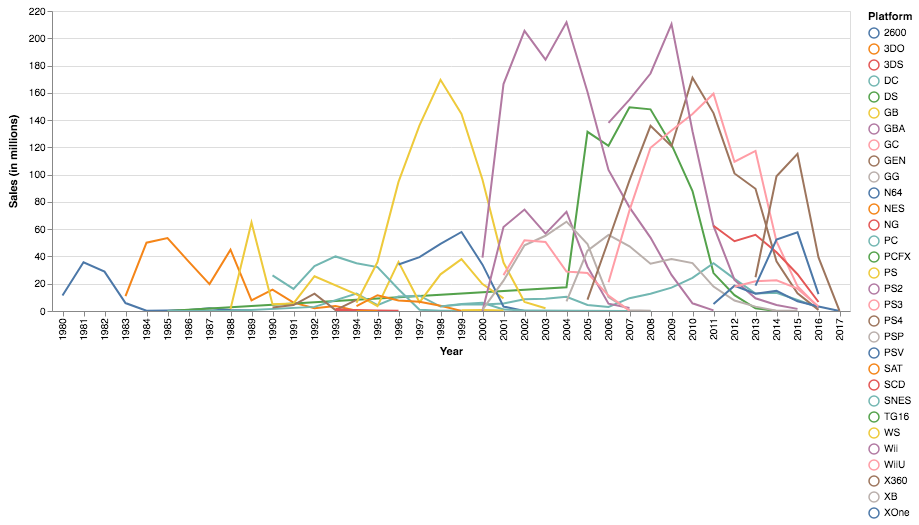

In [225]:
source = pd.melt(df.groupby(['Year', 'Platform']).sum().reset_index(), id_vars=['Year', 'Platform'], 
            value_vars='Global_Sales')

source.Year = source.Year.astype(np.int64).astype('str')

alt.Chart(source).mark_line().encode(
    x='Year',
    y=alt.Y('value',axis=alt.Axis(title='Sales (in millions)')),
    color='Platform'
)

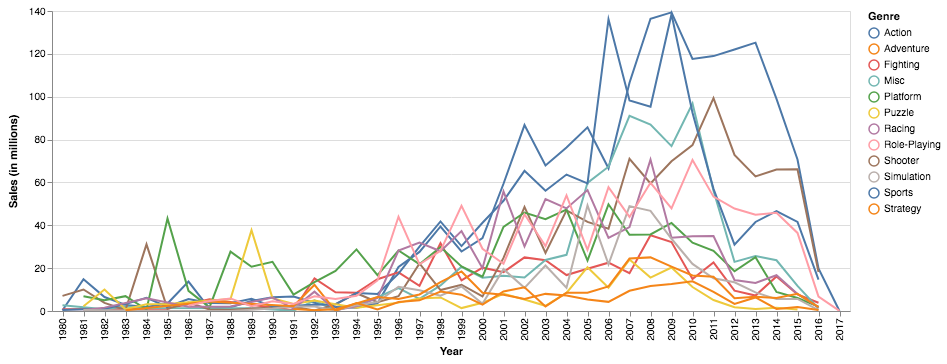

In [226]:
source = pd.melt(df.groupby(['Year', 'Genre']).sum().reset_index(), id_vars=['Year', 'Genre'], 
            value_vars='Global_Sales')

source.Year = source.Year.astype(np.int64).astype('str')

alt.Chart(source).mark_line().encode(
    x='Year',
    y=alt.Y('value',axis=alt.Axis(title='Sales (in millions)')),
    color='Genre'
)

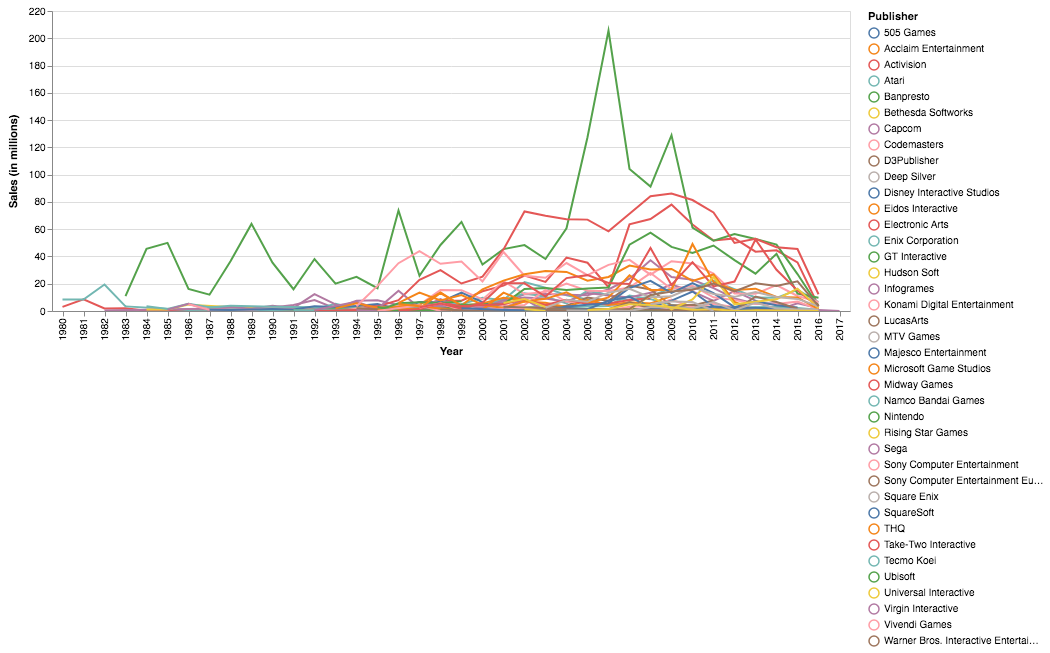

In [228]:
# The rise and fall of Nintendo
source = pd.melt(df_big_publishers.groupby(['Year', 'Publisher']).sum().reset_index(), id_vars=['Year', 'Publisher'], 
            value_vars='Global_Sales')

source.Year = source.Year.astype(np.int64).astype('str')

alt.Chart(source).mark_line().encode(
    x='Year',
    y=alt.Y('value',axis=alt.Axis(title='Sales (in millions)')),
    color='Publisher'
)

## Features about a video game most indicative of success

In [118]:
# Import random forest 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [132]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

df_hot = one_hot(df, ['Platform', 'Genre', 'Publisher'])

In [141]:
# Drop unwanted features
df_hot_ready = df_hot.drop(['Rank', 'Name', 'Platform', 'Genre', 'Publisher'], axis=1)

# Drop features with less than 30 observations
df_hot_ready.drop([col for col, val in df_hot_ready.sum().iteritems() if val < 30], axis=1, inplace=True)

In [144]:
df_hot_ready.shape

(16290, 108)

### Features about video games as function of success - for the past 30 years of gaming history

In [145]:
# Slit into training and testing
X = df_hot_ready.drop(['Global_Sales'], axis =1)
Y = df_hot_ready.filter(['Global_Sales'], axis = 1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [146]:
# Train a Random Forest Regressor
forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
forest.fit(Xtrain, Ytrain.values.ravel())
prediction = forest.predict(Xtest)

In [162]:
# Check feature importance
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(15)

,importance
NA_Sales,0.840255
EU_Sales,0.114974
JP_Sales,0.029402
Other_Sales,0.009310
Year,0.001254
Platform_SNES,0.001020
Genre_Platform,0.000580
Publisher_Nintendo,0.000370
Platform_NES,0.000334
Genre_Racing,0.000238


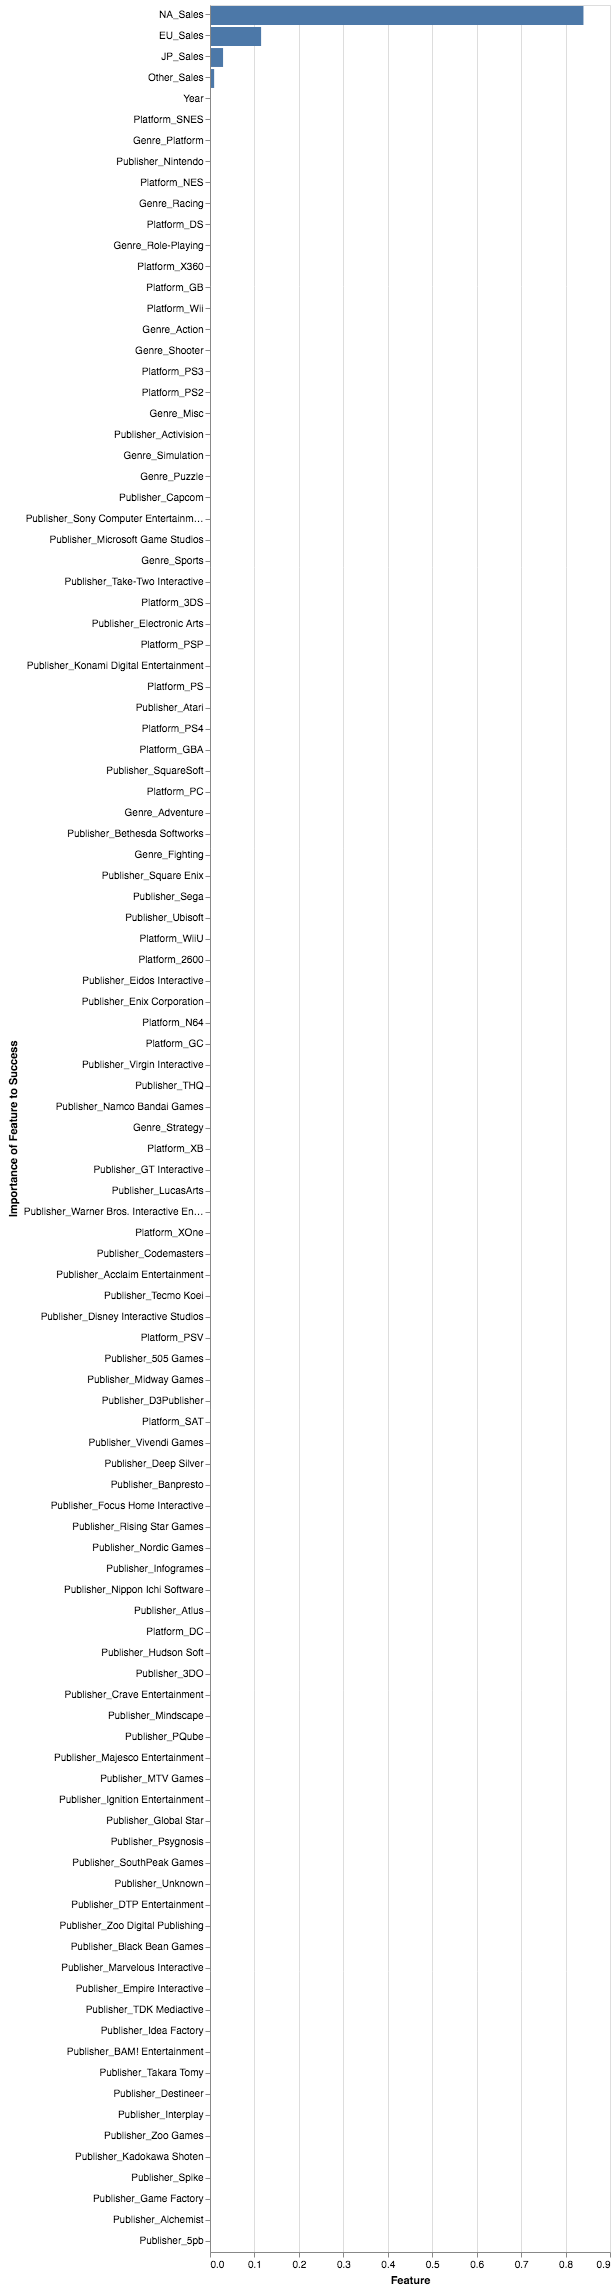

In [158]:
alt.Chart(feature_importances.reset_index()).mark_bar().encode(
    y=alt.Y('index', 
            sort=alt.EncodingSortField(
                field='importance',
                op='sum',
                order='descending'),
            axis=alt.Axis(title='Importance of Feature to Success')),
    x=alt.Y('importance',
            axis=alt.Axis(title='Feature'))
)

Ok, big surprise here (not really), but to do well overall, you need to do well in NA, then EU, then JPN. In other words, it's probably a good idea to focus on NA with marketing and audience tailoring. 

### Predictive features of success aside from regional sales - across the 30 years of gaming history

In [164]:
# What about if we remove the sales data from the Random Forest?
df_hot_ready.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)

In [165]:
# Slit into training and testing
X = df_hot_ready.drop(['Global_Sales'], axis =1)
Y = df_hot_ready.filter(['Global_Sales'], axis = 1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [166]:
# Train a Random Forest Regressor
forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
forest.fit(Xtrain, Ytrain.values.ravel())
prediction = forest.predict(Xtest)

In [169]:
# Check feature importance
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(15)

,importance
Year,0.405045
Publisher_Nintendo,0.107145
Genre_Role-Playing,0.049733
Genre_Shooter,0.035911
Genre_Platform,0.031299
Platform_GB,0.027525
Genre_Action,0.026601
Genre_Misc,0.025944
Genre_Racing,0.025756
Genre_Sports,0.023143


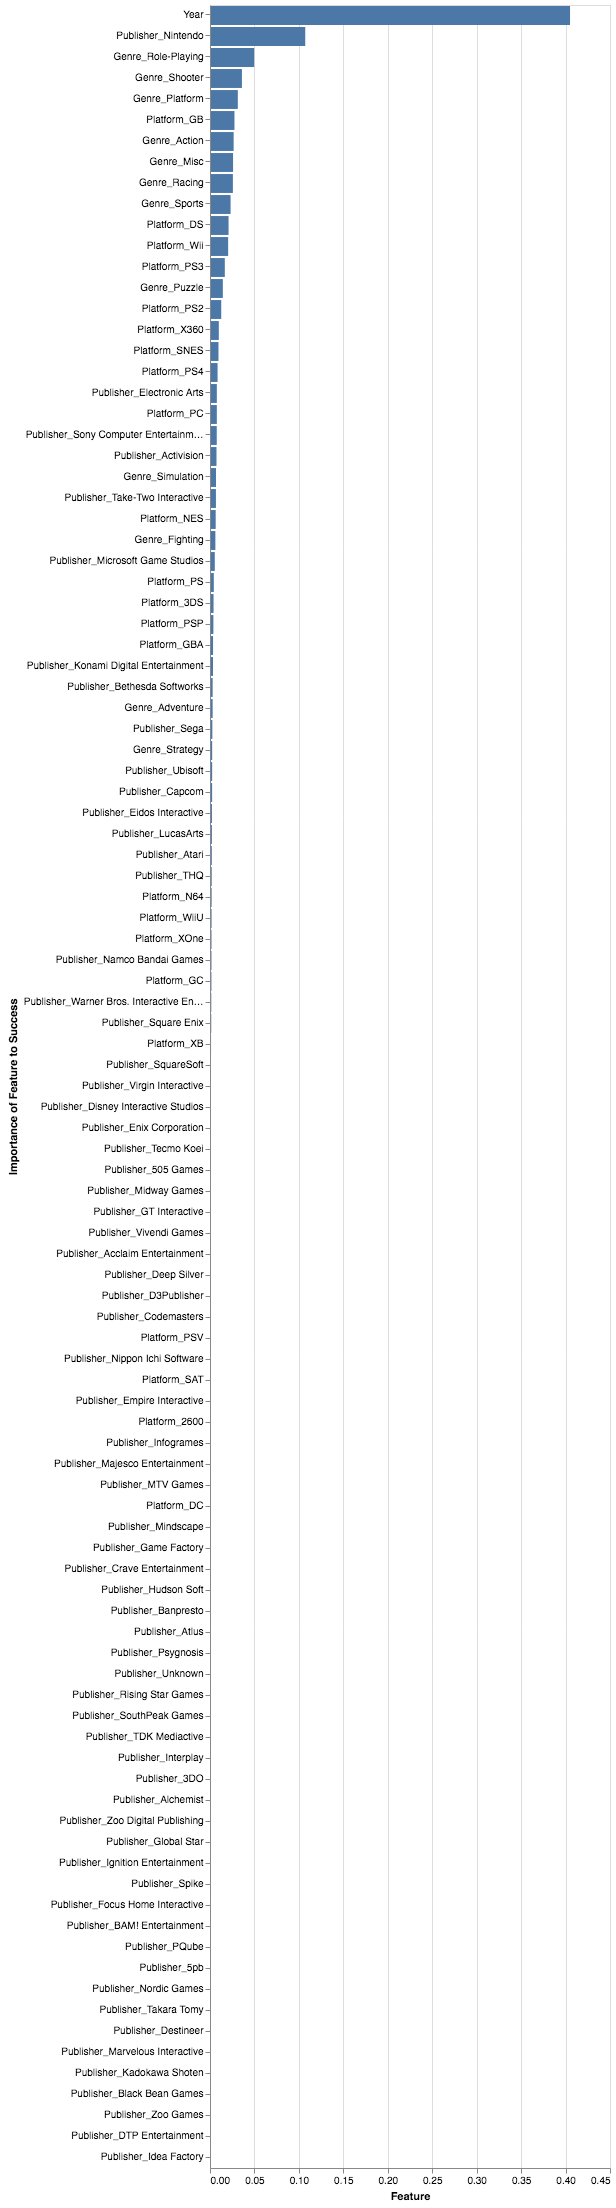

In [168]:
alt.Chart(feature_importances.reset_index()).mark_bar().encode(
    y=alt.Y('index', 
            sort=alt.EncodingSortField(
                field='importance',
                op='sum',
                order='descending'),
            axis=alt.Axis(title='Importance of Feature to Success')),
    x=alt.Y('importance',
            axis=alt.Axis(title='Feature'))
)

That the Year feature is so influential really speaks to the increasing popularity of video games - I'm guessing that the more recent the game, the better its sales volume. Outside of that, it looks like Nintendo is the company to emulate. From there, Role-Playing, Shooters, Platform, Actions, Misc, Racing, and Sports genres all show long-term success. The GameBoy, DF, Wii, and PS3 platforms are also predictors of success. 

These are interesting trends across the last 30 years of gaming, but what about more recent trends? These are much more likely to derive actionable insight. 

### Predictive features about video games as function of success - for the modern gamer (>= 2016)

In [174]:
# Looking at recent trends
df_hot_ready_recent = df_hot_ready.loc[df_hot_ready['Year'] >= 2016]

In [175]:
# Slit into training and testing
X = df_hot_ready_recent.drop(['Global_Sales'], axis =1)
Y = df_hot_ready_recent.filter(['Global_Sales'], axis = 1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [176]:
# Train a Random Forest Regressor
forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
forest.fit(Xtrain, Ytrain.values.ravel())
prediction = forest.predict(Xtest)

In [177]:
# Check feature importance
feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = Xtrain.columns,
                                   columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(15)

,importance
Genre_Shooter,0.163267
Platform_PS4,0.141051
Publisher_Sony Computer Entertainment,0.136728
Publisher_Electronic Arts,0.106583
Genre_Action,0.086109
Publisher_Ubisoft,0.084473
Genre_Sports,0.071848
Platform_XOne,0.032107
Platform_PC,0.028440
Publisher_Nintendo,0.017740


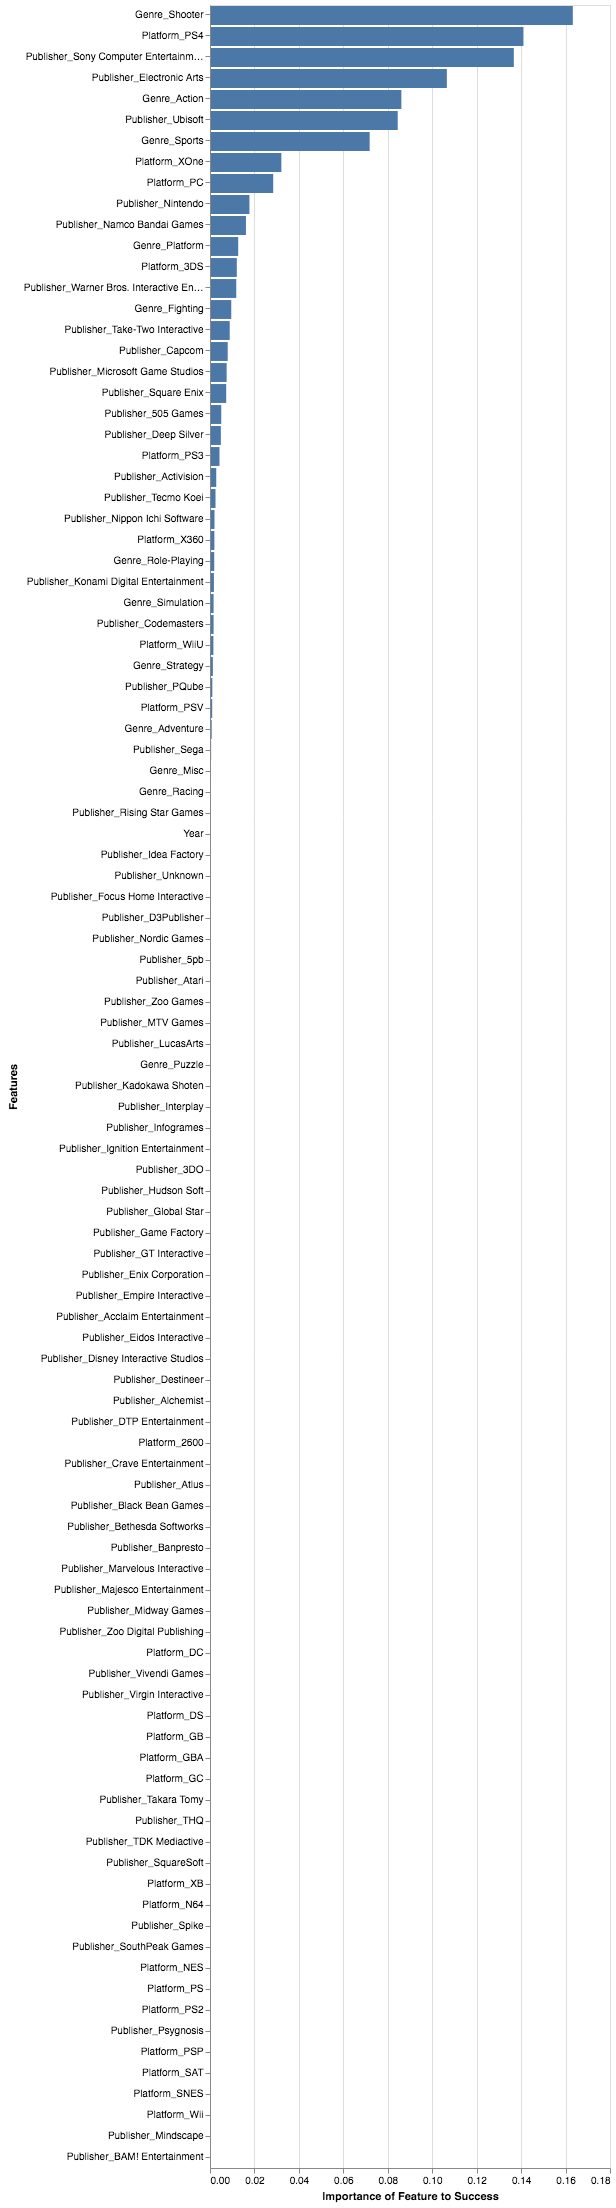

In [179]:
alt.Chart(feature_importances.reset_index()).mark_bar().encode(
    y=alt.Y('index', 
            sort=alt.EncodingSortField(
                field='importance',
                op='sum',
                order='descending'),
            axis=alt.Axis(title='Features')),
    x=alt.Y('importance',
            axis=alt.Axis(title='Importance of Feature to Success'))
)

So you want to make a successful game for the 2016+ market? Looks like Shooters, Action, and Sports games for the PS4, XOne, or PC will get you there. Sony, EA, and Ubisoft seem to be having the most success in this regard and would be the companies to try and emulate (or at least the aspects of those companies that are perceived as working best).  

These results also argue that success could be had with Platform or Fighting genres and that Nintendo, Namco Bandai, Warner Bros., Take-Two, and Square-Enix are still heavy-hitters in terms of success.